In [8]:
from graph_builder import build_graph_for_robot_data
from a_star import find_shortest_path
import importlib
import sys
importlib.reload(sys.modules['graph'])
importlib.reload(sys.modules['interception'])
importlib.reload(sys.modules['graph_builder'])
importlib.reload(sys.modules['a_star'])

<module 'a_star' from '/Users/oknyga/www/personal/linear-algebra/robot-navigation/a_star.py'>

In [12]:
# robot_data = {
#     'start': [0, 0],
#     'finish': [10, 10],
#     'obstacles': [
#         [[2, 2], [2, 4], [3, 3]],
#         [[5, 4], [4, 6], [6, 5], [7, 4]],
#         [[4, 4], [3.5, 4], [2, 6], [3, 7]],
#         [[20, 1], [10, 2], [9, 4], [6, 10]],
#         [[5, 0], [7.5, 1], [8, 3], [7, 2.5], [4, 2.5]]
#     ]
# }

import json
with open('tests/robot-test-15.json') as json_file:
    robot_data = json.load(json_file)
    
# robot_data = {
#     'start': [11, 10],
#     'finish': [3.14, 3.14],
#     'obstacles': [
#         [[1, 8], [1, 11], [5, 11], [3, 7]],
#         [[6, 9], [5, 12], [7, 13]],
#         [[8, 7], [7, 11], [9, 12]],
#         [[10, 10], [10, 12], [12, 12]],
#         [[2, 3], [1, 7], [3, 6], [3, 3]],
#         [[4, 6], [4, 8], [7, 8], [7, 6]],
#         [[9, 4], [9, 10], [11, 4]],
#         [[12, 6], [10, 9], [13, 10]],
#         [[1, 0], [0, 1], [0, 2], [2, 2]],
#         [[2, 1], [6, 2], [7, -1]],
#         [[4, 2],[4, 5], [5, 5], [5, 2]],
#         [[6, 4], [6, 5], [8, 5], [8, 4]],
#         [[6, 3], [11, 3], [11, -2]],
#         [[12, 2], [12, 5], [13, 6], [13, 1]]
#     ]}
graph = build_graph_for_robot_data(robot_data)
# # result = find_shortest_path(graph, tuple(robot_data['start']), tuple(robot_data['finish']))
# # print(result)
len(graph.vertices())

147

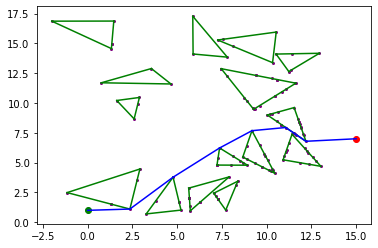

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

for v in graph.vertices():
    plt.plot(v[0], v[1], color='purple', marker='o', markersize=2)

plt.plot(robot_data['start'][0], robot_data['start'][1], color='green', marker='o', markersize=6)
plt.plot(robot_data['finish'][0], robot_data['finish'][1], color='red', marker='o', markersize=6)
for obstacle in robot_data['obstacles']:
    for pindex in range(len(obstacle)):
        plt.plot(*zip(obstacle[pindex-1], obstacle[pindex]), color='green')
path, cost = find_shortest_path(graph, tuple(robot_data['start']), tuple(robot_data['finish']))
for pindex in range(1, len(path)):
    plt.plot(*zip(path[pindex-1], path[pindex]), color='blue')
plt.show()